# 图像分类实验
## 实验目的
通过简单图像分类的卷积模型,掌握以下知识点：
* 数据生成器的使用方法
    .demo_keras.preprocessing.image.ImageDataGenerator.ipynb
* plt基本使用方法    
* 卷积神经网络模型创建：卷积层，密度层，激活函数，损失函数，优化函数
* 模型训练方法
* 模型预测方法
* 训练曲线绘制
* 可视化FeatureMap
* 可视化神经网络的过滤器
* 可视化类激活的热力图

## 实验数据说明
  可以通过脚本 tools/images_split.py划分图像集
  * 实验数据根目录：~/data/img_classify
      - ./train ------训练目录
      - ./valid ------校验目录
      - ./test  ------测试目录
      - ./temp  ------临时目录
      - ./results ----结果输出
     
## 相关函数接口说明
### model.compile
compile
compile(self, optimizer, loss, metrics=[], loss_weights=None, sample_weight_mode=None)
本函数编译模型以供训练，参数有
* optimizer：优化器，为预定义优化器名或优化器对象，参考优化器
* loss：目标函数，为预定义损失函数名或一个目标函数，参考目标函数
* metrics：列表，包含评估模型在训练和测试时的性能的指标，典型用法是metrics=['accuracy']如果要在多输出模型中为不同的输出指定不同的指标，可像该参数传递一个字典，例如metrics={'ouput_a': 'accuracy'}
* sample_weight_mode：如果你需要按时间步为样本赋权（2D权矩阵），将该值设为“temporal”。默认为“None”，代表按样本赋权（1D权）。如果模型有多个输出，可以向该参数传入指定sample_weight_mode的字典或列表。在下面fit函数的解释中有相关的参考内容。
* kwargs：使用TensorFlow作为后端请忽略该参数，若使用Theano作为后端，kwargs的值将会传递给 K.function

【Tips】如果你只是载入模型并利用其predict，可以不用进行compile。在Keras中，compile主要完成损失函数和优化器的一些配置，是为训练服务的。predict会在内部进行符号函数的编译工作（通过调用_make_predict_function生成函数）【@白菜，@我是小将】

### model.fit
fit
fit(self, x, y, batch_size=32, nb_epoch=10, verbose=1, callbacks=[], validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None)
本函数用以训练模型，参数有：
*    x：输入数据。如果模型只有一个输入，那么x的类型是numpy array，如果模型有多个输入，那么x的类型应当为list，list的元素是对应于各个输入的numpy array。如果模型的每个输入都有名字，则可以传入一个字典，将输入名与其输入数据对应起来。
*    y：标签，numpy array。如果模型有多个输出，可以传入一个numpy array的list。如果模型的输出拥有名字，则可以传入一个字典，将输出名与其标签对应起来。
*    batch_size：整数，指定进行梯度下降时每个batch包含的样本数。训练时一个batch的样本会被计算一次梯度下降，使目标函数优化一步。
*    nb_epoch：整数，训练的轮数，训练数据将会被遍历nb_epoch次。Keras中nb开头的变量均为"number of"的意思
*    verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
*    callbacks：list，其中的元素是keras.callbacks.Callback的对象。这个list中的回调函数将会在训练过程中的适当时机被调用，参考回调函数
*    validation_split：0~1之间的浮点数，用来指定训练集的一定比例数据作为验证集。验证集将不参与训练，并在每个epoch结束后测试的模型的指标，如损失函数、精确度等。
*    validation_data：形式为（X，y）或（X，y，sample_weights）的tuple，是指定的验证集。此参数将覆盖validation_spilt。
*    shuffle：布尔值，表示是否在训练过程中每个epoch前随机打乱输入样本的顺序。
*    class_weight：字典，将不同的类别映射为不同的权值，该参数用来在训练过程中调整损失函数（只能用于训练）。该参数在处理非平衡的训练数据（某些类的训练样本数很少）时，可以使得损失函数对样本数不足的数据更加关注。
*    sample_weight：权值的numpy array，用于在训练时调整损失函数（仅用于训练）。可以传递一个1D的与样本等长的向量用于对样本进行1对1的加权，或者在面对时序数据时，传递一个的形式为（samples，sequence_length）的矩阵来为每个时间步上的样本赋不同的权。这种情况下请确定在编译模型时添加了sample_weight_mode='temporal'。

fit函数返回一个History的对象，其History.history属性记录了损失函数和其他指标的数值随epoch变化的情况，如果有验证集的话，也包含了验证集的这些指标变化情况

### model.fit_generator
fit_generator
fit_generator(self, generator, samples_per_epoch, nb_epoch, verbose=1, callbacks=[], validation_data=None, nb_val_samples=None, class_weight={}, max_q_size=10)

利用Python的生成器，逐个生成数据的batch并进行训练。生成器与模型将并行执行以提高效率。例如，该函数允许我们在CPU上进行实时的数据提升，同时在GPU上进行模型训练

函数的参数是：
*    generator：生成器函数，生成器的输出应该为：
        一个形如（inputs，targets）的tuple
        一个形如（inputs, targets,sample_weight）的tuple。所有的返回值都应该包含相同数目的样本。生成器将无限在数据集上循环。每个epoch以经过模型的样本数达到samples_per_epoch时，记一个epoch结束
*    samples_per_epoch：整数，当模型处理的样本达到此数目时计一个epoch结束，执行下一个epoch
*    verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
*    validation_data：具有以下三种形式之一
        生成验证集的生成器
        一个形如（inputs,targets）的tuple
        一个形如（inputs,targets，sample_weights）的tuple
*    nb_val_samples：仅当validation_data是生成器时使用，用以限制在每个epoch结束时用来验证模型的验证集样本数，功能类似于samples_per_epoch
*    max_q_size：生成器队列的最大容量

函数返回一个History对象

例子

def generate_arrays_from_file(path):
    while 1:
    f = open(path)
    for line in f:
        # create numpy arrays of input data
        # and labels, from each line in the file
        x, y = process_line(line)
        yield (x, y)
    f.close()

model.fit_generator(generate_arrays_from_file('/my_file.txt'),
        samples_per_epoch=10000, nb_epoch=10)


### model.evaluate
evaluate
evaluate(self, x, y, batch_size=32, verbose=1, sample_weight=None)
本函数按batch计算在某些输入数据上模型的误差，其参数有：
*    x：输入数据，与fit一样，是numpy array或numpy array的list
*    y：标签，numpy array
*    batch_size：整数，含义同fit的同名参数
*    verbose：含义同fit的同名参数，但只能取0或1
*    sample_weight：numpy array，含义同fit的同名参数

本函数返回一个测试误差的标量值（如果模型没有其他评价指标），或一个标量的list（如果模型还有其他的评价指标）。model.metrics_names将给出list中各个值的含义。

如果没有特殊说明，以下函数的参数均保持与fit的同名参数相同的含义

如果没有特殊说明，以下函数的verbose参数（如果有）均只能取0或1

### model.evaluate_generator
evaluate_generator
evaluate_generator(self, generator, val_samples, max_q_size=10)

本函数使用一个生成器作为数据源，来评估模型，生成器应返回与test_on_batch的输入数据相同类型的数据。

函数的参数是：
*    generator：生成输入batch数据的生成器
*    val_samples：生成器应该返回的总样本数
*    max_q_size：生成器队列的最大容量
*    nb_worker：使用基于进程的多线程处理时的进程数
*    pickle_safe：若设置为True，则使用基于进程的线程。注意因为它的实现依赖于多进程处理，不可传递不可pickle的参数到生成器中，因为它们不能轻易的传递到子进程中。


### model.predict
predict
predict(self, x, batch_size=32, verbose=0)
本函数按batch获得输入数据对应的输出，其参数有：
函数的返回值是预测值的numpy array

### model.predict_generator
predict_generator
predict_generator(self, generator, val_samples, max_q_size=10, nb_worker=1, pickle_safe=False)

从一个生成器上获取数据并进行预测，生成器应返回与predict_on_batch输入类似的数据

函数的参数是：
*    generator：生成输入batch数据的生成器
*    val_samples：生成器应该返回的总样本数
*    max_q_size：生成器队列的最大容量
*    nb_worker：使用基于进程的多线程处理时的进程数
*    pickle_safe：若设置为True，则使用基于进程的线程。注意因为它的实现依赖于多进程处理，不可传递不可pickle的参数到生成器中，因为它们不能轻易的传递到子进程中。



## 参考资料
visualization of filters keras 基于Keras的卷积神经网络（CNN）可视化

http://www.cnblogs.com/bnuvincent/p/9612686.html

python深度学习{eep learning with python中文版.pdf}源码

https://github.com/fchollet/deep-learning-with-python-notebooks

数据下载：

https://www.kaggle.com/c/dogs-vs-cats/data

本地数据

~/e/dataset_tiptical/cats_and_dogs


## 引入库

In [1]:
import keras
import os
import shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from mylibs.ProcessBar import ShowProcess
from mylibs import funs
keras.__version__

Using TensorFlow backend.


'2.2.4'

# 基本参数

In [2]:
data_path='%s/work/data/demo_classify'%(os.getenv('HOME'))  #图像分类数据根目录
batch_size=32                                         #批量大小
data_enhance=False                                    #ImageDataGenerator数据启用数据增强
epochs=1                                              #训练轮次
img_width=150                                         #训练图像宽度
img_height=150                                        #训练图像高度 
test_img_path='%s/test.jpg'%(data_path)               #测试图片路径
num_class=3                                           #类别数

#网络可视化参数
images_per_row=16       #图像显示每行显示的单元个数
feature_map_top_num=8   #FeatureMap前面N层{include_top=False}
img_margin=3            #图像单元空隙
layers_name=['conv2d_1','conv2d_2','conv2d_3','conv2d_4'] #卷积层名称
layers_name=layers_name[:1] #debug
gen_pat_steps=40        #构造迭代次数

# 通用函数

In [3]:
#数据生成器
def DataGen(path,img_width=150,img_height=150,batch_size=32,enhance=False):
    '''数据生成器
    @param path       图像目录,有三个子目录:train,test,val
    @param img_width  生成图像宽度
    @param img_height 生成图像高度
    @param enhance    是否使用数据增强
    使用范例：
        (train_gen,valid_gen,test_gen)=DataGen("./path",150,150,32,False)
        或
        (train_gen,valid_gen,test_gen)=DataGen("./path",150,150,32,False)
        -------
        图像目录：
            ./path/train/cats/*
            ./path/train/dogs/*
            ./path/train/turtle/*
            ./path/val/cats/*
            ./path/val/dogs/*
            ./path/val/turtle/*
            ./path/test/cats/*
            ./path/test/dogs/*
            ./path/test/turtle/*
    '''
    #数据生成器
    if enhance:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,)        
        
    else:
        train_datagen = ImageDataGenerator(rescale=1./255)
        
    valid_datagen = ImageDataGenerator(rescale=1./255)
    
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
            # This is the target directory
            '%s/train'%(path),
            # All images will be resized to 150x150
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='categorical')    
    
    valid_generator = test_datagen.flow_from_directory(
            '%s/val'%(path),
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='categorical')    
    
    test_generator = test_datagen.flow_from_directory(
            '%s/test'%(path),
            target_size=(img_height, img_width),
            batch_size=batch_size,
            shuffle=False,  #测试状态，不需要打乱数据
            class_mode='categorical')
    return (train_generator,valid_generator,test_generator)

#FeatureMap可视化
def ViewFeatureMap():
    pass

#计算精度
def compute_acc(y_pred,y_true):
    acc=(y_pred-y_true)==0
    return acc.sum()/acc.size

#训练曲线
def plot_train_curve(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    

#绘制FeatureMap
def plot_FeatureMap(model,layers_name,img_file,images_per_row=16,img_margin=1):
    '''绘制图像文件的FeatureMap
        model为已经训练好的模型对象
    @param model                训练好的网络模型
    @param layers_name    [list]输出层名称，输出层一般为卷积层
    @param img_file       [str ]图像文件
    @param images_per_row [int ]每行显示多少个特征图
    @param img_margin     [int ]图像单元间隙
    
    使用范例：
        model=...                                #创建/加载模型/模型编译/模型训练 
        layers_name=['conv_1','conv_2','conv_3'] #设置输出层        
        img_file='./test/1.jpg'                  #图像路径
        plot_FeatureMap(model,layers_name,img_file)
    '''
    #加载图像
    img = image.load_img(img_file, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    # Its shape is (1, 150, 150, 3)
    print(img_tensor.shape)
    plt.imshow(img_tensor[0])
    plt.show()

    #创建输出模型
    layer_outputs = [model.get_layer(sname).output for sname in layers_name] #输出层
    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs) #前面N层输出模型
    activations = activation_model.predict(img_tensor)                         #前面N层模型预测    
    for layer_name, layer_activation in zip(layers_name, activations):        
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1] #卷积核个数

        # The feature map has shape (1, size, size, n_features)
        size_width = layer_activation.shape[1]        #FeatureMap大小
        size_height = layer_activation.shape[0]        #FeatureMap大小

        # We will tile the activation channels in this matrix
        rows = n_features // images_per_row   #图像单元行数
        cols=images_per_row                   #图像单元列数

        #初始化图像网格[rows{height} x cols{width}]
        display_grid = np.zeros((rows*size_height+(rows-1)*img_margin, cols * size_width+(cols-1)*img_margin))  

        # We'll tile each filter into this big horizontal grid
        #把FeatureMap按顺序显示在大图网格，每行images_per_row个FeatureMap
        for row in range(rows):
            for col in range(cols):
                #提取FeatureMap
                channel_image = layer_activation[
                                                 :, :,
                                                 row * cols + col]
                # Post-process the feature to make it visually palatable
                #FeatureMap显示优化处理
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                #把FeatureMap拷贝到相应图像单元区间
                row_start=row*size_height+row*img_margin
                row_end=row_start+size_height
                col_start=col*size_width+col*img_margin
                col_end=col_start+size_width
                #print(display_grid.shape)
                print('layer_activation.shape:',layer_activation.shape)
                print('channel_image.shape:',channel_image.shape)
                print('row_start:%d,row_end:%d,col_start:%d,col_end:%d'%(row_start,row_end,col_start,col_end))
                display_grid[row_start : row_end,col_start:col_end] = channel_image

        # Display the grid
        plt.figure(figsize=(1./size_width  * display_grid.shape[1], #width
                            1./size_height * display_grid.shape[0]))#height
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')    
    plt.show() 
    
#可视化卷积神经网络的过滤器
def plot_layer_filter(model,layers_name,img_width=150,img_height=150,img_margin=1,images_per_row=16,gen_pat_steps=20):
    '''可视化卷积神经网络的过滤器
    @param model                训练好的网络模型
    @param layers_name    [list]输出层名称,一般为卷积层
    @param img_width      [int ]过滤器图像宽度
    @param img_height     [int ]过滤器图像高度
    @param img_margin     [int ]图像单元间隙
    @param images_per_row [int ]每行显示图像单元个数
    @param gen_pat_steps  [int ]生成过滤器图像迭代次数
    
    使用范例：
        model=...                                #创建/加载模型/模型编译/模型训练 
        layers_name=['conv_1','conv_2','conv_3'] #设置输出层
        plot_layer_filter(model,layers_name)
        
    '''
    #把数据图像化输出
    def deprocess_image(x):
        '''数据图像化输出
        @param x  数据
        @return   图像化输出结果
        处理流程：
            1. x归一化处理：mean=0,std=0.1
            2. x整体抬升0.5,并作[0,1]裁剪
            3. x整体乘于255,并作[0,255]裁剪
        '''
        # normalize tensor: center on 0., ensure std is 0.1
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 0.1

        # clip to [0, 1]
        x += 0.5
        x = np.clip(x, 0, 1)

        # convert to RGB array
        x *= 255
        x = np.clip(x, 0, 255).astype('uint8')
        return x

    #生成过滤器的最大化输入
    def generate_pattern(model,layer_name, filter_index,steps=40, img_width=150,img_height=150):
        '''生成过滤器的最大化输入
        @param model        网络模型
        @param layer_name   网络层名称，通过名称获取网络层
        @param filter_index 卷积核索引
        @param steps        构造迭代次数
        @param img_width    网络输入图像宽度
        @param img_height   网络输入图像高度
        @return 网络输入图像数据
        '''
        # Build a loss function that maximizes the activation
        # of the nth filter of the layer considered.
        layer_output = model.get_layer(layer_name).output  #网络层输出
        loss = K.mean(layer_output[:, :, :, filter_index]) #构造损失函数

        # Compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]          #梯度计算

        # Normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)  #梯度归一化处理

        # This function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads]) #迭代函数

        # We start from a gray image with some noise
        input_img_data = np.random.random((1, img_height, img_width, 3)) * 20 + 128. #初始化网络输入图像

        # Run gradient ascent for 40 steps
        step = 1.
        for i in range(steps):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step

        img = input_img_data[0]
        return deprocess_image(img)    
    #=============================
    for layer_name in layers_name:
        #type(n_features)#=> <class 'tensorflow.python.framework.tensor_shape.Dimension'>
        n_features=model.get_layer(layer_name).output.shape[-1] #卷积核个数
        rows = n_features // images_per_row   #图像单元行数
        rows=rows.value
        cols=images_per_row                   #图像单元列数

        #初始化图像网格[rows{height} x cols{width}]
        display_grid = np.zeros((rows*img_height+(rows-1)*img_margin, cols * img_width+(cols-1)*img_margin,3))  

        # We'll tile each filter into this big horizontal grid
        print('Generating layer of %s ......'%(layer_name))
        pbar=ShowProcess(100)
        for row in range(rows):
            for col in range(cols):
                filter_index=row*cols+col
                filter_img = generate_pattern(model,layer_name, filter_index,steps=gen_pat_steps, img_width=img_width,img_height=img_height)
                row_start=row*img_height+row*img_margin
                row_end=row_start+img_height
                col_start=col*img_width+col*img_margin
                col_end=col_start+img_width
                #print(display_grid.shape)
                #print('row_start:%d,row_end:%d,col_start:%d,col_end:%d'%(row_start,row_end,col_start,col_end))            
                display_grid[row_start : row_end,col_start:col_end] = filter_img
                pbar.show_process((filter_index*100/(rows*cols)))
        pbar.show_process(100)
        # Display the results grid
        plt.figure(figsize=(20, 20))
        plt.imshow(display_grid)
        plt.show()       
        
#可视化类激活的热力图
def plot_hot_map(model,img_file,img_width=150,img_height=150):
    '''可视化类激活的热力图
    @param model            已经训练好的网络模型
    @param img_file   [str ]测试图像文件
    @param img_width  [int ]输出图像宽度
    @param img_height [int ]输出图像高度
    
    使用范例：
        model=...                                #创建/加载模型/模型编译/模型训练 
        img_file='./test/1.jpg'                  #图像文件
        plot_hot_map(model,layers_name)
    '''
    #图像预处理
    def preprocess_input(x):
        '''
        #圖片預處理使用Keras applications 的 preprocess_input
        #https://medium.com/@sci218mike/%E5%9C%96%E7%89%87%E9%A0%90%E8%99%95%E7%90%86%E4%BD%BF%E7%94%A8keras-applications-%E7%9A%84-preprocess-input-6ef0963a483e        
        
        目前為止Keras提供的pre-train model有
        Xception、VGG16、VGG19、ResNet50、InceptionV3、InceptionResNetV2、MobileNet、DenseNet、NASNet、MobileNetV2
        都可以使用preprocess_input
        (按照Keras documentation排序)
                             input_size        Data_format                    mode
        ----------------------------------------------------------------------------                                 
        Xception             224x224           channels_first/channels_last   tf  
        VGG16                224x224           channels_first/channels_last   caffe
        VGG19                224x224           channels_first/channels_last   caffe
        ResNet50             224x224           channels_first/channels_last   caffe
        InceptionV3          299x299           channels_first/channels_last   tf
        InceptionResNetV2    299x299           channels_first/channels_last   tf
        MobileNet            224x224           channels_last                  tf 
        DenseNet             224x224           channels_first/channels_last   torch
        NASNet               331x331/224x224   channels_first/channels_last   tf
        MobileNetV2          224x224           channels_last                  tf
        ----------------------------------------------------------------------------                                 
        
        各種pretrain model比較
        使用 preprocess_input時輸入為皆為RGB values within [0, 255]

        圖片預處理方式有三種caffe、tf、torch:
        caffe : VGG16、VGG19、ResNet50
        tf : Xception、InceptionV3、InceptionResNetV2、MobileNet、NASNet、MobileNetV2
        torch : DenseNet
        mode = caffe 
        (will convert the images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset)
        減去ImageNet平均 BGR [103.939, 116.779, 123.68]
        mode = tf 
        ( will scale pixels between -1 and 1 )
        除以127.5，然後減 1。
        mode = torch 
        ( will scale pixels between 0 and 1 and then will normalize each channel with respect to the ImageNet dataset)
        除以255，減去ImageNet平均[0.485, 0.456, 0.406] ，除以標準差[0.229, 0.224, 0.225]。        
        '''
        return x/127.5 -1

    #预测值解码
    def decode_predictions(preds,class_indices_rev, top=3):
        print(preds)
        print(class_indices_rev)
        y_index=np.argmax(preds[:top],axis=-1)
        print(y_index)
        y=[class_indices_rev[n] for n in y_index[:]]
        return y    
    #---------------图像预测----------------
    # The local path to our target image
    # `img` is a PIL image of size 224x224
    img = image.load_img(img_file, target_size=(img_height, img_width)) #加载测试图像

    # `x` is a float32 Numpy array of shape (224, 224, 3)
    x = image.img_to_array(img)  #转为numpy格式

    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    x = np.expand_dims(x, axis=0) #增加samples维

    # Finally we preprocess the batch
    # (this does channel-wise color normalization)
    x = preprocess_input(x)  #图像数组预处理

    preds = model.predict(x) #模型预测
    class_indices_rev={v:k for k,v in test_gen.class_indices.items()}
    print('Predicted:', decode_predictions(preds,class_indices_rev, top=3))
    
    #---------------显示原始图像--------------
    plt.figure()
    plt.imshow(img)
    plt.show()     
    
    #---------------通过预测值找到对应的输出层(Dense层输出置信度)-------------
    pred_index=np.argmax(preds[0])
    # This is the "african elephant" entry in the prediction vector    
    african_elephant_output = model.output[:, pred_index]

    # The is the output feature map of the `block5_conv3` layer,
    # the last convolutional layer in VGG16
    last_conv_layer_name=layers_name[-1]
    last_conv_layer = model.get_layer(last_conv_layer_name)

    # This is the gradient of the "african elephant" class with regard to
    # the output feature map of `block5_conv3`
    grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

    # This is a vector of shape (512,), where each entry
    # is the mean intensity of the gradient over a specific feature map channel
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # This function allows us to access the values of the quantities we just defined:
    # `pooled_grads` and the output feature map of `block5_conv3`,
    # given a sample image
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    # These are the values of these two quantities, as Numpy arrays,
    # given our sample image of two elephants
    pooled_grads_value, conv_layer_output_value = iterate([x])

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the elephant class
    for i in range(last_conv_layer.output.shape[-1]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(conv_layer_output_value, axis=-1)   
    
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    plt.matshow(heatmap)
    plt.show()    
    
    import cv2
    # We use cv2 to load the original image
    img = cv2.imread(test_img_path)

    # We resize the heatmap to have the same size as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)

    # We apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # 0.4 here is a heatmap intensity factor
    superimposed_img = heatmap * 0.4 + img

    # Save the image to disk
    #cv2.imwrite('/Users/fchollet/Downloads/elephant_cam.jpg', superimposed_img)
    img_hot_path='%s/test_hot.jpg'%(data_path)
    cv2.imwrite(img_hot_path, superimposed_img)

    img = image.load_img(img_hot_path, target_size=(img_height, img_width))
    plt.figure()
    plt.imshow(img)
    plt.show()   

# 加载数据

In [4]:
#数据生成器
(train_gen,valid_gen,test_gen)=DataGen(data_path
                                       ,img_width=img_width,img_height=img_height
                                       ,batch_size=batch_size,enhance=data_enhance)

Found 2719 images belonging to 3 classes.
Found 1280 images belonging to 3 classes.
Found 1301 images belonging to 3 classes.


# 创建模型

In [5]:
#创建模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(img_height, img_width, 3),name='conv2d_1'))
model.add(layers.MaxPooling2D((2, 2),name='max_pooling2d_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',name='conv2d_2'))
model.add(layers.MaxPooling2D((2, 2),name='max_pooling2d_2'))
model.add(layers.Conv2D(128, (3, 3), activation='relu',name='conv2d_3'))
model.add(layers.MaxPooling2D((2, 2),name='max_pooling2d_3'))
model.add(layers.Conv2D(128, (3, 3), activation='relu',name='conv2d_4'))
model.add(layers.MaxPooling2D((2, 2),name='max_pooling2d_4'))
model.add(layers.Flatten(name='flatten_1'))
model.add(layers.Dense(512, activation='relu',name='dense_1'))
model.add(layers.Dense(num_class, activation='softmax',name='dense_2'))

#打印模型
model.summary()
       
#模型编译
model.compile(loss='categorical_crossentropy',
          optimizer=optimizers.RMSprop(lr=1e-4),
          metrics=['acc'])    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# 模型训练

In [6]:
#模型训练
print('training beginning ......')

#结果输出目录
out_path='%s/results'%(data_path)
os.makedirs(out_path) if not os.path.exists(out_path) else ''
log_dir='%s/results/log_dir'%(data_path)
os.makedirs(log_dir) if not os.path.exists(log_dir) else ''
cp_file='%s/results/cp_point.h5'%(data_path)

#断点加载
if os.path.exists(cp_file):
    model.load_weights(cp_file)
            
#断点训练:monitor监控参数可以通过score = model.evaluate(x_test, y_test, verbose=0)的score查询
checkpoint_cb = keras.callbacks.ModelCheckpoint(cp_file, monitor='val_acc', verbose=1, save_best_only=True, mode='auto',period=2)
#EarlyStopping
earlyStopping_cb=keras.callbacks.EarlyStopping(monitor='acc', patience=3, verbose=0, mode='max')
#TensorBoard
tensorBoard_cb=keras.callbacks.TensorBoard(log_dir=log_dir)
#回调函数序列
callbacks_list = [checkpoint_cb,earlyStopping_cb,tensorBoard_cb]

#模型训练
history = model.fit_generator(
  train_gen,
  steps_per_epoch=np.ceil(train_gen.samples/batch_size),
  epochs=epochs,
  validation_data=valid_gen,
  validation_steps=50,
  callbacks=callbacks_list)

training beginning ......
Epoch 1/1
85/85 [==============================] - 53s 618ms/step - loss: 0.5467 - acc: 0.7587 - val_loss: 0.6774 - val_acc: 0.6975


# 模型测试

In [7]:
#模型测试
print('predicting beginning ......')
#type(y_pred)=> <class 'numpy.ndarray'>
y_pred=model.predict_generator(
    test_gen, 
    steps=None, #预测轮数
    max_queue_size=32, 
    workers=1, 
    use_multiprocessing=False, 
    verbose=1)

predicting beginning ......
41/41 [==============================] - 9s 224ms/step


In [8]:
acc=compute_acc(np.argmax(y_pred,axis=1),test_gen.classes)
print('samples:',test_gen.samples)
print('classes[:10]:')
print(test_gen.classes[:10])
print('y_pred.shape:',y_pred.shape)
print('y_pred[:10]:')
print(y_pred[:10])
print('准确率:',acc)

samples: 1301
classes[:10]:
[0 0 0 0 0 0 0 0 0 0]
y_pred.shape: (1301, 3)
y_pred[:10]:
[[9.6213669e-01 2.8244417e-02 9.6189585e-03]
 [1.1986032e-01 8.7966144e-01 4.7831851e-04]
 [2.6344401e-01 2.1517211e-01 5.2138388e-01]
 [8.4122419e-01 1.5089823e-01 7.8775389e-03]
 [9.1645461e-01 7.7317432e-02 6.2278947e-03]
 [2.7282542e-01 3.2062957e-01 4.0654504e-01]
 [4.7181541e-01 2.9470176e-01 2.3348288e-01]
 [3.6996812e-02 9.4588172e-01 1.7121531e-02]
 [7.9316723e-01 1.9616605e-01 1.0666708e-02]
 [3.2003024e-01 6.7443877e-01 5.5309958e-03]]
准确率: 0.6940814757878555


# 实验结果-训练曲线

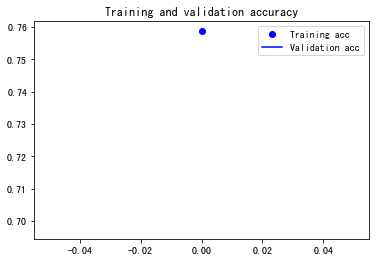

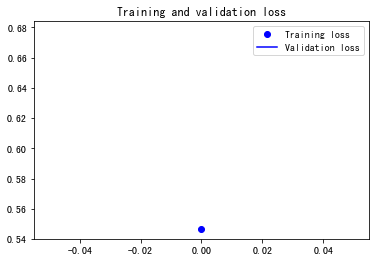

In [9]:
plot_train_curve(history)    

# 测试图像

(1, 150, 150, 3)


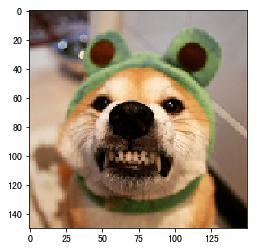

In [10]:
img = image.load_img(test_img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

# FeatureMap视图

(1, 150, 150, 3)


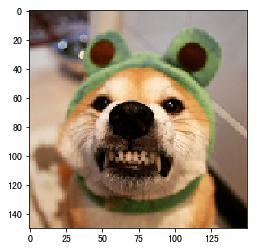

layer_activation.shape: (148, 148, 32)
channel_image.shape: (148, 148)
row_start:0,row_end:148,col_start:0,col_end:148
layer_activation.shape: (148, 148, 32)
channel_image.shape: (148, 148)
row_start:0,row_end:148,col_start:151,col_end:299
layer_activation.shape: (148, 148, 32)
channel_image.shape: (148, 148)
row_start:0,row_end:148,col_start:302,col_end:450
layer_activation.shape: (148, 148, 32)
channel_image.shape: (148, 148)
row_start:0,row_end:148,col_start:453,col_end:601
layer_activation.shape: (148, 148, 32)
channel_image.shape: (148, 148)
row_start:0,row_end:148,col_start:604,col_end:752
layer_activation.shape: (148, 148, 32)
channel_image.shape: (148, 148)
row_start:0,row_end:148,col_start:755,col_end:903
layer_activation.shape: (148, 148, 32)
channel_image.shape: (148, 148)
row_start:0,row_end:148,col_start:906,col_end:1054
layer_activation.shape: (148, 148, 32)
channel_image.shape: (148, 148)
row_start:0,row_end:148,col_start:1057,col_end:1205
layer_activation.shape: (148, 1

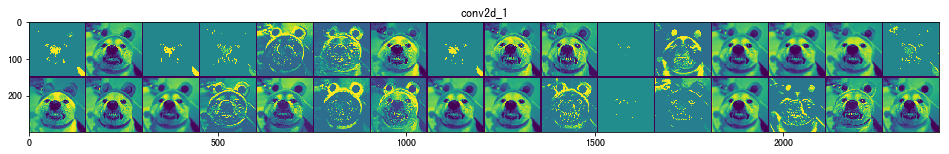

In [11]:
#绘制FeatureMap    
plot_FeatureMap(model,layers_name,test_img_path,images_per_row=images_per_row,img_margin=img_margin)

# 可视化卷积神经网络的过滤器

Generating layer of conv2d_1 ......


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Done


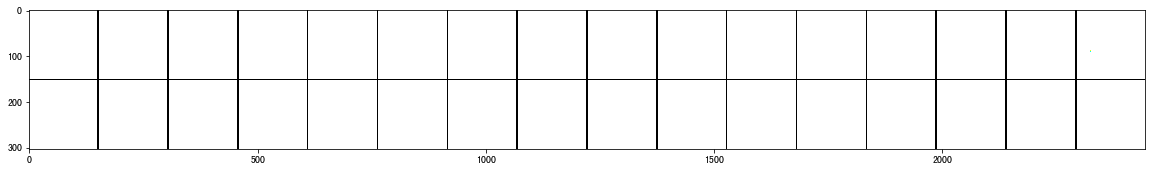

In [12]:


#可视化卷积神经网络的过滤器
plot_layer_filter(model,layers_name,img_width=img_width,img_height=img_height
                  ,img_margin=img_margin,images_per_row=images_per_row,gen_pat_steps=gen_pat_steps)

# 可视化类激活的热力图

[[2.0894088e-02 2.6428547e-06 9.7910327e-01]]
{0: 'cats', 1: 'dogs', 2: 'turtle'}
[2]
Predicted: ['turtle']


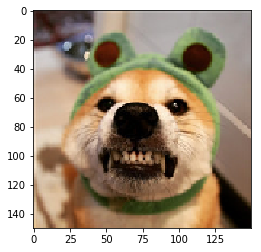

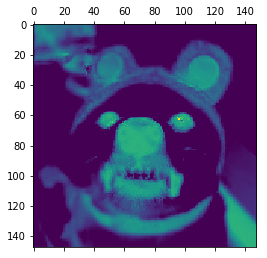

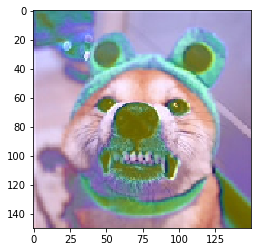

In [23]:
#可视化类激活的热力图
plot_hot_map(model,img_file=test_img_path,img_width=img_width,img_height=img_height)